# SkillFactory
## Введение в ML, введение в sklearn

В этом задании мы с вами рассмотрим данные с конкурса [Задача предсказания отклика клиентов ОТП Банка](http://www.machinelearning.ru/wiki/index.php?title=%D0%97%D0%B0%D0%B4%D0%B0%D1%87%D0%B0_%D0%BF%D1%80%D0%B5%D0%B4%D1%81%D0%BA%D0%B0%D0%B7%D0%B0%D0%BD%D0%B8%D1%8F_%D0%BE%D1%82%D0%BA%D0%BB%D0%B8%D0%BA%D0%B0_%D0%BA%D0%BB%D0%B8%D0%B5%D0%BD%D1%82%D0%BE%D0%B2_%D0%9E%D0%A2%D0%9F_%D0%91%D0%B0%D0%BD%D0%BA%D0%B0_%28%D0%BA%D0%BE%D0%BD%D0%BA%D1%83%D1%80%D1%81%29)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,7)

### Грузим данные

Считаем описание данных

In [2]:

df_descr = pd.read_csv('data/otp_description.csv', sep='\t', encoding='utf8')

In [3]:
df_descr

,ПОЛЕ,ОПИСАНИЕ
0,AGREEMENT_RK,уникальный идентификатор объекта в выборке
1,AGE,возраст клиента
2,SOCSTATUS_WORK_FL,социальный статус клиента относительно работы ...
3,SOCSTATUS_PENS_FL,социальный статус клиента относительно пенсии ...
4,GENDER,"пол клиента (1- женщины, 0-мужчины)"
5,CHILD_TOTAL,количество детей клиента
6,DEPENDANTS,количество иждивенцев клиента
7,EDUCATION,образование
8,MARITAL_STATUS,семейное положение
9,GEN_INDUSTRY,отрасль работы клиента


Считаем обучающую выборки и тестовую (которую мы как бы не видим)

In [4]:
df_train = pd.read_csv('data/otp_train.csv', sep='\t', encoding='utf8')

In [5]:
df_train.shape

(15223, 52)

In [6]:
df_test = pd.read_csv('data/otp_test.csv', sep='\t', encoding='utf8')

In [7]:
df_test.shape

(14910, 52)

In [8]:
df_train.head()

,AGREEMENT_RK,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,EDUCATION,MARITAL_STATUS,...,REG_PHONE_FL,GEN_PHONE_FL,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,PREVIOUS_CARD_NUM_UTILIZED
0,59910150,0,49,1,0,1,2,1,Среднее специальное,Состою в браке,...,0,1,1,1,6,2,1,1580,1580,NaN
1,59910230,0,32,1,0,1,3,3,Среднее,Состою в браке,...,0,1,1,1,6,1,1,4020,4020,NaN
2,59910525,0,52,1,0,1,4,0,Неполное среднее,Состою в браке,...,0,1,2,1,11,0,0,0,0,NaN
3,59910803,0,39,1,0,1,1,1,Высшее,Состою в браке,...,1,1,1,1,6,3,1,"1589,92333333333",1590,NaN
4,59911781,0,30,1,0,0,0,0,Среднее,Состою в браке,...,0,1,2,1,16,2,1,"1152,15",2230,NaN


## Объединим две выборки

Так как пока мы пока не умеем работать sklearn  Pipeline, то для того, чтобы после предобработки столбцы в двух выборках находились на своих местах.

Для того, чтобы в дальнейшем отделить их введем новый столбец "sample"

In [9]:
df_train.loc[:, 'sample'] = 'train'
df_test.loc[:, 'sample'] = 'test'

In [10]:
df = df_test.append(df_train).reset_index(drop=True)

In [11]:
df.shape

(30133, 53)

### Чуть-чуть посмотрим на данные

Посмотрим типы данных и их заполняемость

In [12]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15223 entries, 0 to 15222
Data columns (total 53 columns):
AGREEMENT_RK                  15223 non-null int64
TARGET                        15223 non-null int64
AGE                           15223 non-null int64
SOCSTATUS_WORK_FL             15223 non-null int64
SOCSTATUS_PENS_FL             15223 non-null int64
GENDER                        15223 non-null int64
CHILD_TOTAL                   15223 non-null int64
DEPENDANTS                    15223 non-null int64
EDUCATION                     15223 non-null object
MARITAL_STATUS                15223 non-null object
GEN_INDUSTRY                  13856 non-null object
GEN_TITLE                     13856 non-null object
ORG_TP_STATE                  13856 non-null object
ORG_TP_FCAPITAL               13858 non-null object
JOB_DIR                       13856 non-null object
FAMILY_INCOME                 15223 non-null object
PERSONAL_INCOME               15223 non-null object
REG_ADDRESS_PRO

Видим, что часть данных - object, скорее всего стоки.


Давайте выведем эти значения для каждого столбца

In [13]:
for i in df.columns: # перебираем все столбцы
    if str(df[i].dtype) == 'object': # если тип столбца - object
        print('='*10)
        print(i) # выводим название столбца
        for j in range(len(set(df[i]))):
            print list(set(df[i]))[j],', ',
#        print set(df[i]) # выводим все его значения (но делаем set - чтоб значения не повторялись)
        print('\n') # выводим пустую строку

EDUCATION
Ученая степень ,  Неполное среднее ,  Неоконченное высшее ,  Два и более высших образования ,  Высшее ,  Среднее ,  Среднее специальное ,  

MARITAL_STATUS
Разведен(а) ,  Вдовец/Вдова ,  Не состоял в браке ,  Гражданский брак ,  Состою в браке ,  

GEN_INDUSTRY
nan ,  Информационные услуги ,  Туризм ,  Торговля ,  Строительство ,  СМИ/Реклама/PR-агенства ,  Сельское хозяйство ,  Управляющая компания ,  Маркетинг ,  Коммунальное хоз-во/Дорожные службы ,  Здравоохранение ,  ЧОП/Детективная д-ть ,  Химия/Парфюмерия/Фармацевтика ,  Ресторанный бизнес/Общественное питание ,  Логистика ,  Юридические услуги/нотариальные услуги ,  Банк/Финансы ,  Наука ,  Подбор персонала ,  Недвижимость ,  Транспорт ,  Сборочные производства ,  Информационные технологии ,  Государственная служба ,  Развлечения/Искусство ,  Страхование ,  Нефтегазовая промышленность ,  Энергетика ,  Салоны красоты и здоровья ,  Металлургия/Промышленность/Машиностроение ,  Другие сферы ,  Образование ,  

GEN_TITLE
n

nan ,  Ульяновская область ,  Марийская республика ,  Мурманская область ,  Сахалинская область ,  Омская область ,  Орловская область ,  Амурская область ,  Ставропольский край ,  Новгородская область ,  Воронежская область ,  Краснодарский край ,  Самарская область ,  Кемеровская область ,  Белгородская область ,  Карелия ,  Смоленская область ,  Владимирская область ,  Тюменская область ,  Липецкая область ,  Адыгея ,  Пензенская область ,  Нижегородская область ,  Ханты-Мансийский АО ,  Архангельская область ,  Псковская область ,  Алтайский край ,  Кировская область ,  Читинская область ,  Ярославская область ,  Пермская область ,  Волгоградская область ,  Башкирия ,  Чувашия ,  Приморский край ,  Москва ,  Тамбовская область ,  Бурятия ,  Калужская область ,  Челябинская область ,  Хабаровский край ,  Кабардино-Балкария ,  Курская область ,  Костромская область ,  Иркутская область ,  Калининградская область ,  Брянская область ,  Свердловская область ,  Удмуртия ,  Мордовская ре

16063,29 ,  7799,2 ,  35230 ,  48580 ,  11542 ,  11540 ,  28991 ,  28990 ,  11545 ,  28999 ,  28998 ,  5988 ,  5989 ,  5980 ,  5987 ,  19391 ,  19390 ,  22260 ,  22263 ,  22265 ,  22264 ,  37640,77 ,  22266 ,  22269 ,  25060 ,  19710 ,  6796 ,  6797 ,  27372 ,  6795 ,  6792 ,  6793 ,  6790 ,  6799 ,  56125 ,  98644 ,  25459,3 ,  4641 ,  25287 ,  25280 ,  16250 ,  19977 ,  16256 ,  19975 ,  16254 ,  16704 ,  16701 ,  16700 ,  12019 ,  22480 ,  22483 ,  22482 ,  12011 ,  12010 ,  12012 ,  17258 ,  26397 ,  26396 ,  64670 ,  26390 ,  30700 ,  17250 ,  17251 ,  10899,6 ,  17254 ,  52466 ,  10709 ,  30702 ,  9529 ,  9259 ,  9256 ,  9525 ,  9526 ,  9255 ,  9520 ,  10706 ,  9250 ,  10704 ,  24881 ,  24880 ,  21619 ,  24886 ,  24885 ,  21615 ,  19929,91 ,  83295,63 ,  20802 ,  26022 ,  26020 ,  45110 ,  16647 ,  47783,85 ,  12849 ,  22870 ,  22871 ,  22872 ,  10618 ,  24081 ,  5985 ,  24086 ,  24085 ,  37790 ,  38500 ,  3512 ,  3510 ,  3516 ,  3515 ,  21610,6 ,  31910 ,  90645 ,  36840 ,  7780

6089 ,  6086 ,  6087 ,  6080 ,  12070 ,  23279 ,  3285 ,  15943 ,  25778 ,  24864 ,  18240,91 ,  21850 ,  21856 ,  21858 ,  21673 ,  21670 ,  3647 ,  3646 ,  3645 ,  3640 ,  2550 ,  2552 ,  2555 ,  26085 ,  26084 ,  26080 ,  26082 ,  11477 ,  11475 ,  11473 ,  11470 ,  11471 ,  5010 ,  5011 ,  5013 ,  31694 ,  5015 ,  5016 ,  5018 ,  5019 ,  46881 ,  38832 ,  38830 ,  17149 ,  17144 ,  17145 ,  17146 ,  17415 ,  17140 ,  17141 ,  17411 ,  25197 ,  31695 ,  25195 ,  36750 ,  4419 ,  4416 ,  13302 ,  4412 ,  13300 ,  4410 ,  9546 ,  9545 ,  36287 ,  9540 ,  14829 ,  10467,1 ,  24695,2 ,  58900 ,  14820 ,  15990 ,  14775,71 ,  21847 ,  20106 ,  20102 ,  20100 ,  99289 ,  22944 ,  36136 ,  9989,92 ,  44778 ,  44770 ,  13944 ,  41500 ,  27598 ,  27599 ,  27846 ,  4590,2 ,  59761 ,  40900 ,  21362 ,  29707 ,  29250 ,  29700 ,  18500 ,  18502 ,  11810 ,  11811 ,  37440 ,  11819 ,  78350 ,  34280 ,  15150 ,  17598,9 ,  3894,2 ,  31702 ,  28790,94 ,  31700 ,  7169 ,  7163 ,  7160 ,  16045,2 ,  

,  5388 ,  9576,1 ,  3961 ,  13908 ,  4218 ,  18105 ,  18100 ,  39720 ,  5579 ,  5577 ,  5576 ,  5575 ,  5573 ,  5571 ,  5570 ,  34020 ,  5798 ,  7240,5 ,  14472 ,  23420,7 ,  31300 ,  24531,06 ,  11115 ,  28420 ,  6990,91 ,  11227 ,  6380,91 ,  11116 ,  11223 ,  6990,92 ,  11220 ,  19050 ,  19051 ,  27617,1 ,  9536 ,  19055 ,  32976 ,  22302 ,  22303 ,  22300 ,  25901 ,  25900 ,  3690,82 ,  33550,35 ,  5280,91 ,  8717 ,  25650 ,  25301 ,  25300 ,  47529,91 ,  3960,9 ,  23437 ,  19945,35 ,  82650 ,  26241,6 ,  2990,92 ,  19630 ,  15100,82 ,  7376 ,  16198 ,  16199 ,  16629 ,  16194 ,  42468 ,  16197 ,  16190 ,  16191 ,  16620 ,  16621 ,  6109 ,  6108 ,  6105 ,  6104 ,  6103 ,  6102 ,  12750 ,  6100 ,  4140,2 ,  10938 ,  10939 ,  13848 ,  10935 ,  10936 ,  16994 ,  63700 ,  16996 ,  16990 ,  16991 ,  16992 ,  9448 ,  9111 ,  9110 ,  9445 ,  9444 ,  16998 ,  16999 ,  9117 ,  9440 ,  12284 ,  12285 ,  16448 ,  16449 ,  12280 ,  12283 ,  16443 ,  16440 ,  16441 ,  12288 ,  16447 ,  21150 ,

 19170 ,  19177 ,  13380,56 ,  30738 ,  56210 ,  14365 ,  20620 ,  19280 ,  6136,58 ,  23869 ,  19286 ,  19289 ,  23865 ,  23861 ,  6918,34 ,  27156 ,  27150 ,  25137 ,  25133 ,  25420 ,  25426 ,  29790 ,  19820 ,  6689 ,  14540,04 ,  6680 ,  6681 ,  6682 ,  97040 ,  6686 ,  39900 ,  2420 ,  2421 ,  16834 ,  16833 ,  7848 ,  30873 ,  16830 ,  7845 ,  7847 ,  25317 ,  19828 ,  16838 ,  12106 ,  6354 ,  6350 ,  12100 ,  15093,9 ,  7637,63 ,  6358 ,  6359 ,  79959 ,  9340 ,  9341 ,  9342 ,  9344 ,  9345 ,  9610 ,  9347 ,  10166 ,  21286,1 ,  36952 ,  20147,92 ,  10161 ,  10160 ,  21707 ,  21704 ,  21703 ,  21250 ,  21700 ,  24119 ,  14889 ,  14880 ,  7190,94 ,  6073 ,  41211 ,  41210 ,  4008 ,  6071 ,  26959 ,  26955 ,  19889,92 ,  26950 ,  14080 ,  14081 ,  14082 ,  14083 ,  14089 ,  9246 ,  29599 ,  3220 ,  3222 ,  13277 ,  13275 ,  13270 ,  13271 ,  138400 ,  13278 ,  13279 ,  40309 ,  2848 ,  13715 ,  2844 ,  2840 ,  3320 ,  3321 ,  28500 ,  5475 ,  5472 ,  5470 ,  3327 ,  32421,5 ,  

87673 ,  6883 ,  6880 ,  15790 ,  15798 ,  6519 ,  15914 ,  2054 ,  40691 ,  29410 ,  23109 ,  23108 ,  15540 ,  22167,6 ,  23103 ,  23100 ,  23106 ,  23104 ,  15571 ,  15570 ,  8279 ,  8278 ,  30814 ,  15579 ,  30813 ,  8270 ,  29677 ,  77860 ,  16092 ,  26880 ,  9514 ,  4274 ,  26889 ,  9517 ,  31140 ,  16544 ,  18908,1 ,  14498 ,  8419 ,  11893,5 ,  16298,1 ,  8412 ,  34660 ,  8410 ,  8416 ,  8415 ,  18123 ,  35825 ,  7588 ,  7589 ,  35821 ,  15291,92 ,  7584 ,  6231 ,  9805 ,  7587 ,  7580 ,  7581 ,  7582 ,  9800 ,  15398 ,  12590,1 ,  12651 ,  18126 ,  22500 ,  22509 ,  4134,4 ,  6950 ,  15460 ,  12654 ,  26478 ,  26479 ,  12096,2 ,  6953 ,  4149 ,  4148 ,  4147 ,  14678 ,  9679 ,  4140 ,  3856 ,  24658 ,  3855 ,  3852 ,  28100 ,  18885 ,  24650 ,  24651 ,  32449 ,  3858 ,  22760 ,  22761 ,  22763 ,  15427 ,  75535,08 ,  75424 ,  33730 ,  32387 ,  73308 ,  18550 ,  32644 ,  16146 ,  73306 ,  73300 ,  92951 ,  2243,7 ,  31850 ,  43573 ,  51200 ,  19300 ,  19301 ,  16170 ,  55995 , 

 ,  51534 ,  3032 ,  20885,2 ,  23085 ,  10646 ,  23216 ,  3888,48 ,  25182,4 ,  25868 ,  14548,2 ,  23882 ,  23331 ,  2210,4 ,  17398,2 ,  17398,1 ,  7022,7 ,  14570,01 ,  8577 ,  8570 ,  34562 ,  42300 ,  6470,9 ,  8034,2 ,  9573,1 ,  15252 ,  6247,8 ,  12570 ,  2732,63 ,  15255 ,  35960 ,  31420 ,  14885 ,  7407 ,  7400 ,  19083 ,  19080 ,  15016 ,  19738 ,  19085 ,  16507 ,  19734 ,  16057 ,  19736 ,  16050 ,  16501 ,  16500 ,  22687 ,  22685 ,  6628 ,  6629 ,  12616 ,  6624 ,  6625 ,  6622 ,  6620 ,  12610 ,  13018,1 ,  26595 ,  38058 ,  26592 ,  26590 ,  18022 ,  26598 ,  65250 ,  33978,63 ,  19883 ,  19550 ,  21015 ,  19880 ,  21012 ,  19885 ,  19556 ,  22061 ,  15220 ,  22066 ,  22068 ,  15226 ,  13625 ,  2331 ,  2333 ,  31931 ,  13620 ,  13623 ,  17308 ,  4719 ,  13181,81 ,  25480 ,  25485 ,  3376,8 ,  3715 ,  3717 ,  33183,4 ,  3711 ,  18280 ,  3712 ,  21901 ,  21900 ,  14700 ,  3718 ,  60500 ,  17673 ,  17670 ,  4909 ,  4908 ,  42699 ,  14147,1 ,  4679 ,  4678 ,  13566 ,  13

25558 ,  13297 ,  4761 ,  2040 ,  11849,2 ,  14436,1 ,  6196 ,  6197 ,  6190 ,  6191 ,  6192 ,  6193 ,  13654 ,  18356 ,  6198 ,  6199 ,  42320 ,  4366,8 ,  15192,73 ,  2730 ,  4767 ,  8221 ,  20090 ,  20091 ,  45863 ,  71880,3 ,  20095 ,  20097 ,  9184 ,  9182 ,  10368 ,  9180 ,  21520 ,  10366 ,  10361 ,  10360 ,  9189 ,  6452 ,  19269 ,  16900 ,  6779,07 ,  7201 ,  7200 ,  7207 ,  7204 ,  12213 ,  77982 ,  6220 ,  6221 ,  12219 ,  11990,91 ,  5431,2 ,  15848 ,  9416 ,  15843 ,  15840 ,  15844 ,  10509 ,  6370 ,  43995,3 ,  11990,95 ,  9764 ,  9765 ,  10500 ,  29345 ,  9769 ,  78390 ,  18940 ,  24170 ,  18945 ,  24174 ,  13779,81 ,  24179 ,  12124 ,  11618 ,  8852 ,  8850 ,  8857 ,  8856 ,  3130 ,  96970 ,  32479,99 ,  8604 ,  40098 ,  18458 ,  39690 ,  26820 ,  71999 ,  5275 ,  5276 ,  5277 ,  5270 ,  5272 ,  93890 ,  5279 ,  3138 ,  10318 ,  33476 ,  10238,82 ,  4741 ,  20205 ,  16669,84 ,  14133 ,  4689,94 ,  30974 ,  19740 ,  24540 ,  37996 ,  18361 ,  18360 ,  58670 ,  17997 ,  

4420 ,  13330 ,  13337 ,  4427 ,  4425 ,  5799,2 ,  9551 ,  9550 ,  9555 ,  9554 ,  9557 ,  8718,1 ,  12211 ,  19011 ,  25122 ,  20133 ,  23730 ,  20131 ,  20960 ,  44760 ,  39996 ,  83407 ,  6189,3 ,  4928,96 ,  27877 ,  41511 ,  15907 ,  84570 ,  22350 ,  13491 ,  22600 ,  26145 ,  29719 ,  28417 ,  44495 ,  95670 ,  11860 ,  18510 ,  14814 ,  8930 ,  11866 ,  27020 ,  8938 ,  8939 ,  15440 ,  15140 ,  2830,5 ,  15147 ,  15148 ,  7170 ,  7173 ,  14678,63 ,  12935 ,  7179 ,  7178 ,  12490,91 ,  33598 ,  40707 ,  9840,6 ,  12889 ,  8195 ,  34010 ,  12884 ,  12880 ,  26650 ,  22198,1 ,  14765 ,  11135 ,  14766 ,  14760 ,  24247 ,  24241 ,  24240 ,  28599 ,  6415 ,  23020 ,  23021 ,  28041 ,  19417 ,  28594 ,  23026 ,  22372 ,  22374 ,  6946,92 ,  31190 ,  4228 ,  31196 ,  13934 ,  4227 ,  4220 ,  4221 ,  13933 ,  5586 ,  11194,06 ,  5585 ,  28623 ,  28622 ,  5580 ,  28620 ,  12317 ,  4633 ,  24790 ,  62240 ,  24795 ,  5589 ,  72220 ,  5309 ,  21984,55 ,  11275 ,  13689 ,  11277 ,  11270

4269 ,  11997,2 ,  18115 ,  18113 ,  18110 ,  18119 ,  5548 ,  11815 ,  5542 ,  5543 ,  5540 ,  23467 ,  13229,2 ,  5544 ,  17660 ,  30060 ,  11817 ,  8598 ,  8599 ,  33700 ,  7404 ,  8595 ,  8590 ,  31333 ,  35369 ,  10803,84 ,  35360 ,  5890 ,  11239 ,  5895 ,  5897 ,  11230 ,  5899 ,  11236 ,  87786 ,  13575 ,  25911 ,  4666 ,  4986,5 ,  22330 ,  25319 ,  4915 ,  25313 ,  25315 ,  25640 ,  4661 ,  37016 ,  4910 ,  23425 ,  23423 ,  6039 ,  9894 ,  9895 ,  27124 ,  9890 ,  9891 ,  39120 ,  6594 ,  9898 ,  9899 ,  37235 ,  5253 ,  28778,3 ,  16618 ,  9527 ,  16613 ,  32320 ,  15900,5 ,  16615 ,  12542 ,  28472 ,  6138 ,  22590 ,  3746,7 ,  22599 ,  12760 ,  6136 ,  6137 ,  6135 ,  10948 ,  13918 ,  10940 ,  2974,15 ,  10945 ,  10947 ,  16476 ,  16474 ,  16470 ,  9472 ,  9470 ,  3077 ,  9477 ,  16479 ,  24999 ,  24998 ,  61973 ,  24990 ,  21160 ,  24995 ,  14316 ,  24996 ,  18953 ,  37017 ,  14310 ,  7949 ,  12421 ,  2248 ,  2245 ,  2240 ,  2241 ,  26177 ,  21347 ,  24190 ,  21345 ,  1

 ,  17748 ,  13180 ,  20659 ,  20657 ,  17740 ,  27975 ,  20653 ,  20650 ,  15936 ,  36000 ,  8639 ,  11528 ,  12508,2 ,  25029,9 ,  6995 ,  42928 ,  80000 ,  20385 ,  20380 ,  20381 ,  26596 ,  20388 ,  34958 ,  20478 ,  34950 ,  48120 ,  30980 ,  20477 ,  20475 ,  23219,85 ,  7336 ,  7335 ,  9291 ,  9296 ,  9294 ,  7330 ,  6272 ,  9298 ,  9299 ,  7339 ,  11965 ,  11966 ,  11960 ,  18439 ,  11968 ,  33459 ,  11202,3 ,  71600 ,  15600 ,  15602 ,  15605 ,  12928 ,  10215 ,  10214 ,  7703,1 ,  10216 ,  10021,5 ,  10210 ,  10213 ,  10212 ,  5333 ,  7059 ,  10500,72 ,  7050 ,  7057 ,  7054 ,  37752 ,  18389 ,  78000 ,  37200 ,  18380 ,  8149 ,  8148 ,  15930 ,  6998 ,  6999 ,  30765 ,  8638 ,  30987 ,  8140 ,  6997 ,  6990 ,  6991 ,  8630 ,  26730 ,  24380 ,  2999 ,  24386 ,  37415 ,  2990 ,  17427,33 ,  2992 ,  2995 ,  2996 ,  31587 ,  31580 ,  24389 ,  47520 ,  67944 ,  21446 ,  24127 ,  3792,92 ,  9999 ,  9998 ,  20132 ,  9991 ,  9990 ,  9992 ,  9995 ,  9994 ,  9997 ,  9996 ,  11037 ,  

,  20009 ,  27448 ,  30550 ,  8564 ,  8293 ,  40110 ,  19572,1 ,  12541 ,  15613 ,  15260 ,  18517,1 ,  2573 ,  15780 ,  6890 ,  6893 ,  6892 ,  15784 ,  41609 ,  24236 ,  15788 ,  6898 ,  41600 ,  41601 ,  35082 ,  29400 ,  2045 ,  11930,92 ,  10907 ,  3009 ,  2719,2 ,  12548 ,  15619 ,  47600 ,  8798 ,  8799 ,  8249 ,  15569 ,  8790 ,  34380 ,  15566 ,  8793 ,  8794 ,  8795 ,  8244 ,  8797 ,  29660 ,  29661 ,  2043 ,  29664 ,  26890 ,  29668 ,  10204 ,  26898 ,  3337 ,  31605 ,  31604 ,  34125 ,  4132,5 ,  8424 ,  8425 ,  8423 ,  8420 ,  34650 ,  8429 ,  17437 ,  28535 ,  50000 ,  9838 ,  9839 ,  3595 ,  7599 ,  7598 ,  7597 ,  14215 ,  9830 ,  7593 ,  9837 ,  7590 ,  9128 ,  35950 ,  23110 ,  10306 ,  10657 ,  22570 ,  5035 ,  22575 ,  11660,93 ,  10302 ,  7470 ,  20040 ,  75360 ,  26404 ,  35775 ,  24667 ,  4139 ,  24665 ,  8666 ,  24660 ,  4130 ,  4131 ,  4135 ,  5692 ,  32430 ,  5690 ,  5691 ,  5694 ,  5695 ,  3849 ,  3848 ,  5698 ,  5699 ,  8006,1 ,  22799 ,  22798 ,  6419,78 , 

3990,92 ,  25260 ,  25263 ,  14709 ,  99313 ,  19950 ,  6649,2 ,  20670 ,  32240 ,  16279 ,  16278 ,  6007 ,  6004 ,  7648 ,  88000 ,  6000 ,  17117 ,  17273 ,  17270 ,  17276 ,  9270 ,  9271 ,  39780 ,  7396 ,  10729 ,  7390 ,  9276 ,  7392 ,  9278 ,  36865 ,  7399 ,  10720 ,  10050 ,  27781 ,  26663,6 ,  13408 ,  31498,2 ,  63000 ,  6194,7 ,  12389 ,  12385 ,  12384 ,  12380 ,  33126 ,  12382 ,  21270 ,  26000 ,  20240 ,  8981 ,  6993 ,  13324 ,  30799 ,  9098 ,  9099 ,  9094 ,  9095 ,  9096 ,  9097 ,  9090 ,  44260 ,  46800 ,  21588 ,  21586 ,  42850 ,  21580 ,  21582 ,  5098 ,  5099 ,  98808 ,  3578 ,  17490 ,  5090 ,  5091 ,  5092 ,  3570 ,  22850 ,  17499 ,  4497 ,  4496 ,  4495 ,  4494 ,  13382 ,  13383 ,  20988 ,  4490 ,  20987 ,  32770 ,  20980 ,  2669 ,  44408 ,  7277,1 ,  2936 ,  44400 ,  2934 ,  2835,15 ,  2930 ,  2931 ,  18589 ,  4080,7 ,  11898 ,  11899 ,  5320 ,  14609 ,  11895 ,  11896 ,  11897 ,  11890 ,  18584 ,  14600 ,  14601 ,  20187 ,  28464 ,  20180 ,  40119,5 , 

1869 ,  6000,81 ,  600,9 ,  16070 ,  16000,1 ,  3812,6 ,  4027 ,  2553 ,  4020 ,  3926 ,  11548 ,  538 ,  1093,4 ,  5499 ,  10899 ,  5989 ,  592 ,  1999,8 ,  19556 ,  5980 ,  5984 ,  5985 ,  345 ,  346 ,  7514 ,  340 ,  3999 ,  3997 ,  3995 ,  19151 ,  349 ,  7519 ,  3990 ,  964 ,  3482 ,  11080 ,  965 ,  3071,52 ,  6156 ,  6157 ,  22000 ,  961 ,  6794 ,  6795 ,  6792 ,  4640 ,  8164 ,  2319 ,  1956,37 ,  2314 ,  4739 ,  2310 ,  5850 ,  298 ,  299 ,  297 ,  293 ,  749,95 ,  5611 ,  3776 ,  15521 ,  52000 ,  4788 ,  2496 ,  3098,88 ,  272 ,  273 ,  4650 ,  1279,9 ,  9661,66 ,  279 ,  1500,2 ,  41830 ,  3650,1 ,  962 ,  12015 ,  12012 ,  7889 ,  2268 ,  2269 ,  804,5 ,  4931,6 ,  2260 ,  7882 ,  43500 ,  7887 ,  2265 ,  2442 ,  2440 ,  1781 ,  2444 ,  1004 ,  42906 ,  2448 ,  10700 ,  9520 ,  10706 ,  9250 ,  60000 ,  8200 ,  3257,04 ,  7860 ,  100 ,  8201 ,  7999 ,  5874,6 ,  12520 ,  2046 ,  2047 ,  2044 ,  2045 ,  2042 ,  2040 ,  2041 ,  36330 ,  6050 ,  1374,88 ,  9411 ,  6399,9 ,  6

,  1394 ,  9923 ,  150 ,  2439 ,  11790 ,  2433 ,  2430 ,  2437 ,  5472 ,  34698,2 ,  245,6 ,  5767 ,  5974,22 ,  2650,92 ,  8688 ,  7836 ,  12110 ,  6340 ,  1233,2 ,  3000,92 ,  8130 ,  4510 ,  4517 ,  4515 ,  12144,42 ,  14786 ,  22799,2 ,  2506 ,  2505 ,  2504 ,  2503 ,  2500 ,  9600 ,  9602 ,  2723 ,  1216,85 ,  2720 ,  5280 ,  5283 ,  5285 ,  3158 ,  10176 ,  2728 ,  7945 ,  7230 ,  959,3 ,  5047 ,  556,2 ,  5045 ,  5044 ,  27350 ,  5040 ,  1807 ,  1806 ,  3780 ,  1803 ,  1802 ,  1800 ,  8990 ,  1809 ,  1808 ,  4996 ,  368,95 ,  10160 ,  4993 ,  4990 ,  3089 ,  3749,74 ,  6230 ,  4999 ,  10489,92 ,  14855 ,  14674 ,  867 ,  500,91 ,  3088 ,  10227,2 ,  10512 ,  10516 ,  9770 ,  10515 ,  1256 ,  1948 ,  1949 ,  3498 ,  8861 ,  5548,4 ,  3251 ,  1940 ,  3253 ,  19150 ,  8868 ,  1600,92 ,  818 ,  0 ,  1255 ,  5398,1 ,  2535 ,  810 ,  811 ,  812 ,  813 ,  21648 ,  816 ,  508,79 ,  2859 ,  2858 ,  11689 ,  1522 ,  1622 ,  2850 ,  2852 ,  6349,2 ,  1621 ,  2857 ,  1490 ,  3332 ,  1492 ,

1441 ,  1116 ,  1119 ,  4992 ,  10095 ,  8064 ,  1449 ,  10777 ,  1805 ,  4091 ,  1219 ,  4095 ,  4098 ,  1356 ,  5735 ,  48800 ,  5730 ,  489 ,  488 ,  4507,34 ,  485 ,  483 ,  4587 ,  481 ,  480 ,  6958 ,  640,32 ,  7589 ,  40664 ,  7584 ,  7586 ,  451 ,  7582 ,  9800 ,  35000 ,  7740 ,  8491 ,  7747 ,  7744 ,  7745 ,  7749 ,  3920 ,  22500 ,  3924 ,  15606 ,  1564 ,  1999,2 ,  891,4 ,  8300 ,  2400,1 ,  3639,5 ,  13613 ,  2400,5 ,  1777,91 ,  2092,94 ,  23691 ,  5825 ,  15200 ,  4145 ,  2064,91 ,  681,2 ,  3298,92 ,  8099 ,  5653 ,  3855 ,  3850 ,  8263 ,  2000,22 ,  1331,78 ,  500,95 ,  688,86 ,  2006 ,  6098 ,  1515,7 ,  1356,4 ,  42518 ,  6092 ,  6094 ,  2898 ,  10000,1 ,  4823 ,  2383 ,  6820 ,  6650 ,  1000,88 ,  1000,89 ,  10807 ,  10800 ,  2482,84 ,  21839 ,  195 ,  197 ,  1800,1 ,  1399,8 ,  6387 ,  3679 ,  6380 ,  5198 ,  4559 ,  6480 ,  3670 ,  1399,3 ,  3677 ,  4550 ,  3675 ,  1106 ,  2540 ,  2547 ,  2546 ,  2545 ,  1455 ,  2549 ,  1104 ,  26090 ,  10100 ,  2380 ,  24900 

14990,94 ,  391,2 ,  19990 ,  2358 ,  48000 ,  2352 ,  2353 ,  2350 ,  622 ,  2357 ,  2355 ,  2316 ,  7280 ,  1488 ,  9108 ,  10673 ,  677,5 ,  5246,5 ,  9105 ,  481,8 ,  9103 ,  9100 ,  4453 ,  9490 ,  4450 ,  1898 ,  1899 ,  4455 ,  1894 ,  1895 ,  1896 ,  1897 ,  1890 ,  1892 ,  1890,5 ,  2136 ,  958 ,  2135 ,  2132 ,  4694 ,  2130 ,  2131 ,  950 ,  953 ,  952 ,  955 ,  954 ,  956 ,  11044 ,  20810 ,  1178,18 ,  5160 ,  2785 ,  14000 ,  9016 ,  2643 ,  528,5 ,  2645 ,  2647 ,  1616,47 ,  25300 ,  2257,11 ,  10330 ,  12367 ,  305,1 ,  10097 ,  3420 ,  4033,93 ,  3425 ,  2000 ,  2001 ,  4589 ,  2007 ,  2004 ,  475 ,  4856 ,  2008 ,  2009 ,  4580 ,  4851 ,  4850 ,  1540,84 ,  10299 ,  4770 ,  1143 ,  4186,59 ,  14179 ,  555,2 ,  1544 ,  1268 ,  13300 ,  900,2 ,  880,2 ,  20561 ,  3555 ,  5033 ,  29590 ,  3550 ,  2299,9 ,  1625,2 ,  2880,1 ,  3559 ,  2855 ,  1258,85 ,  11850 ,  504 ,  385,3 ,  34000 ,  8903 ,  2177 ,  2910 ,  2911 ,  1799 ,  1798 ,  2915 ,  2916 ,  718 ,  2918 ,  716 , 

 ,  6820,45 ,  5330 ,  5334 ,  48155 ,  18590 ,  13700 ,  709 ,  63213 ,  1631 ,  3216 ,  1633 ,  1200,84 ,  1635 ,  1980 ,  3213 ,  1638 ,  47350 ,  63219 ,  38650 ,  3718,2 ,  3219 ,  10750 ,  1691,6 ,  498,6 ,  8820 ,  422,1 ,  33665 ,  1710,1 ,  706 ,  568 ,  2814 ,  2816 ,  2811 ,  2810 ,  2812 ,  560 ,  561 ,  562 ,  564 ,  2818 ,  567 ,  3171 ,  3170 ,  3173 ,  3172 ,  3175 ,  29000 ,  7080 ,  30791 ,  1188 ,  1189 ,  5425 ,  410,4 ,  1185 ,  1182 ,  5420 ,  1180 ,  3370 ,  1360,92 ,  2036 ,  724 ,  1480 ,  722 ,  1749 ,  720 ,  721 ,  372 ,  1745 ,  9467 ,  1740 ,  728 ,  729 ,  6495 ,  1165 ,  1166 ,  1167 ,  1160 ,  1161 ,  1162 ,  15383 ,  4244 ,  1484 ,  1168 ,  1169 ,  4240 ,  13950 ,  5521 ,  2584 ,  14614 ,  1489 ,  837,91 ,  785,9 ,  11170 ,  5532,66 ,  17110 ,  7240 ,  1364 ,  1568 ,  1569 ,  1299 ,  3000,95 ,  2405,69 ,  1516 ,  1560 ,  1293 ,  1290 ,  1291 ,  1296 ,  1297 ,  1294 ,  1295 ,  439,95 ,  31350 ,  8396 ,  1361 ,  8390 ,  795 ,  7280,83 ,  794 ,  8008 ,  1

6938,27 ,  3303,2 ,  2081,78 ,  1386,115 ,  3201,95 ,  721,151428571429 ,  768,97 ,  1329,54 ,  2340,06777777778 ,  2482,72 ,  4020 ,  586,501428571429 ,  567,51 ,  564,93 ,  826,64 ,  777,84 ,  1180,16666666667 ,  340 ,  7510 ,  3155,89333333333 ,  1296,4 ,  3231,2 ,  324,16 ,  1468,38 ,  676,85 ,  1144,03 ,  4680 ,  1388,83769230769 ,  2597,78 ,  2310 ,  5850 ,  4830 ,  1630,344 ,  1626,75 ,  355,04 ,  1077,605 ,  3770 ,  1615,22 ,  1339,99 ,  1459,54666666667 ,  270 ,  4650 ,  478,13 ,  1288,898 ,  1547,02 ,  2189,99 ,  724,38 ,  1736,4 ,  1287,35 ,  2260 ,  2265 ,  2440 ,  1717,47333333333 ,  1829,73 ,  100 ,  1138,2 ,  4810 ,  2040 ,  3752,02 ,  2979,31 ,  2217,25 ,  2178,925 ,  2608,17142857143 ,  413,145 ,  1563,61 ,  3235,24 ,  3783,78 ,  9453,33333333333 ,  949,89 ,  1313,33333333333 ,  3510 ,  6200 ,  3659,0625 ,  2680 ,  1000 ,  782,21 ,  1134,58 ,  2499,775 ,  1095,88 ,  1095,89 ,  2250,56 ,  1719,72 ,  1990 ,  5180 ,  1620 ,  1995 ,  1626 ,  3200 ,  648,68 ,  1088,48 ,  39

778,07 ,  3040 ,  2979,57 ,  71,71 ,  580,49 ,  5370 ,  1070 ,  957,4 ,  1670 ,  868,01 ,  1094 ,  4230,185 ,  1090 ,  2627,58666666667 ,  1021,13 ,  670 ,  1258,95 ,  315,796666666667 ,  3130 ,  5603,82 ,  1678,99 ,  3138 ,  1173,46 ,  54,58 ,  2769,82 ,  727,79 ,  2235,225 ,  1516,872 ,  1093,75 ,  1675,75 ,  1320 ,  1325 ,  3011,18 ,  805,86 ,  1312,44 ,  4834,28 ,  4164,34 ,  1498,2 ,  5760 ,  684,89 ,  683,9975 ,  2598,9 ,  921,58 ,  5560 ,  1520 ,  1250 ,  84,07 ,  970,155 ,  3959 ,  791,56 ,  300 ,  574,21 ,  818,74 ,  3950 ,  857,956666666667 ,  2464,55 ,  518,9 ,  988,5025 ,  1437,01 ,  2315,64857142857 ,  969,59 ,  1597,92 ,  2779,29 ,  1479,11 ,  1498,26 ,  2081,36 ,  2043,665 ,  1429,97 ,  2122,45 ,  798,53 ,  1160,21 ,  1010,55 ,  860,505 ,  1889,43 ,  4060 ,  1965,32 ,  660,6 ,  1307,99 ,  5780 ,  1020,7725 ,  1340,16 ,  3600 ,  1371,86 ,  1317,32 ,  2592,5 ,  367,35 ,  1374,28 ,  3377,57 ,  3075,82 ,  552,57 ,  1145,85 ,  2350 ,  7280 ,  4450 ,  1774,5175 ,  848,45 ,  20

6938,27 ,  3303,2 ,  2081,78 ,  3089,5 ,  2482,72 ,  4020 ,  564,93 ,  826,64 ,  3201,95 ,  777,84 ,  340 ,  5980,18 ,  7510 ,  1719,72 ,  1296,4 ,  3231,2 ,  324,16 ,  797,16 ,  1311,53 ,  676,85 ,  1144,03 ,  4680 ,  2597,78 ,  2310 ,  5850 ,  4830 ,  1626,75 ,  2944,54 ,  3770 ,  1339,99 ,  861,03 ,  4650 ,  478,13 ,  1547,02 ,  2189,99 ,  2176,36 ,  724,38 ,  1736,4 ,  1287,35 ,  2260 ,  2265 ,  1110,39 ,  2440 ,  2158,72 ,  100 ,  1138,2 ,  2040 ,  2979,35 ,  3752,02 ,  2217,25 ,  1563,61 ,  3235,24 ,  3783,78 ,  3783,76 ,  951,12 ,  949,89 ,  2890,47 ,  3510 ,  6200 ,  2680 ,  1000 ,  1134,58 ,  3637,43 ,  1095,88 ,  1095,89 ,  2250,56 ,  1990 ,  5180 ,  1620 ,  3200 ,  648,68 ,  3990 ,  2860 ,  550 ,  553 ,  376,08 ,  919,88 ,  7670 ,  1093,22 ,  2372,77 ,  1190 ,  3340 ,  1320,85 ,  789,23 ,  1628,45 ,  1750 ,  806,93 ,  1170 ,  2503,19 ,  2685,68 ,  1004,8 ,  1729,66 ,  758,95 ,  758,96 ,  2354,29 ,  1165,25 ,  1280 ,  908,78 ,  755,76 ,  879 ,  2693,8 ,  1570 ,  680 ,  682 , 

,  1050 ,  1053 ,  1683,49 ,  811,49 ,  647,42 ,  1690 ,  4310 ,  714 ,  1270 ,  610 ,  1999,73 ,  717,9 ,  712,12 ,  830,7 ,  937,6 ,  1071,44 ,  799,09 ,  3110 ,  1470 ,  2258,3 ,  1300 ,  1272,81 ,  2262,73 ,  5047,5 ,  4220 ,  664,94 ,  1433,4 ,  767,7 ,  5580 ,  1881,83 ,  1792,71 ,  2102,75 ,  1127,63 ,  1006,59 ,  517,51 ,  2252,3 ,  2281,1 ,  816,3 ,  1077,03 ,  988,85 ,  849,19 ,  3840 ,  1040,5 ,  2573,8 ,  1292,59 ,  1783,55 ,  2058,71 ,  4112,53 ,  1549,18 ,  4056,11 ,  1199,15 ,  1883,04 ,  6660 ,  212,25 ,  1398,58 ,  3660 ,  1317,12 ,  5401,67 ,  339,83 ,  1583,15 ,  2493,97 ,  1186,31 ,  875,09 ,  1745,19 ,  1233,33 ,  1775,46 ,  2570 ,  2370 ,  1674,3 ,  997,66 ,  997,65 ,  3590 ,  2590 ,  1443,3 ,  1740,19 ,  5030 ,  827,57 ,  790,77 ,  1870 ,  975 ,  4940 ,  3464,88 ,  970 ,  4158,85 ,  772,73 ,  880,2 ,  2110 ,  796,59 ,  2620 ,  2157,32 ,  2006,83 ,  1517,51 ,  1910 ,  5100 ,  3280 ,  3231,88 ,  860 ,  828,51 ,  3440 ,  866 ,  2020 ,  2750 ,  2758 ,  1136,44 ,  880

Mожно заметить что некоторые переменные, которые обозначены как строки (например PERSONAL_INCOME) на самом деле числа, но по какой-то причине были распознаны как строки

Причина же что использовалась запятая для разделения не целой части числа..

Перекодировать их можно например так:

In [14]:
df['PERSONAL_INCOME'].map(lambda x: x.replace(',', '.')).astype('float')[-10:]

30123    15000.0
30124     8100.0
30125     9500.0
30126    13000.0
30127    10000.0
30128    12000.0
30129    10000.0
30130     6000.0
30131     4500.0
30132    20000.0
Name: PERSONAL_INCOME, dtype: float64

Такой эффект наблюдается в столбцах `PERSONAL_INCOME`, `CREDIT`, `FST_PAYMENT`, `LOAN_AVG_DLQ_AMT`, `LOAN_MAX_DLQ_AMT`

### Теперь ваше небольшое исследование

#### Задание 1. Есть ли пропуски в данных? Что с ними сделать?

(единственного верного ответа нет - аргументируйте)

In [15]:
for i in df.columns:
    if df.count()[i] < df.shape[0] :
        print i,'\t\t\t', 'null ', df[i].isnull().sum(),'\t','//', #,'notnull ', df.count()[i]
        print df_descr[df_descr[u'ПОЛЕ'] == i].iloc[0, 1]

GEN_INDUSTRY 			null  2713 	// отрасль работы клиента
GEN_TITLE 			null  2713 	// должность
ORG_TP_STATE 			null  2713 	// форма собственности компании
ORG_TP_FCAPITAL 			null  2708 	// отношение к иностранному капиталу
JOB_DIR 			null  2713 	// направление деятельности в нутри компании
TP_PROVINCE 			null  590 	// область торговой точки, где клиент брал последний кредит
REGION_NM 			null  2 	// регион РФ
WORK_TIME 			null  2717 	// время работы на текущем месте (в месяцах)
PREVIOUS_CARD_NUM_UTILIZED 			null  29533 	// количество уже утилизированных карт ( если пусто - 0) 


In [16]:
# пропуск в признаке 'REGION_NM' заполню модой, т.к. признак категориальный.
#for i in range(len(set(df['REGION_NM']))):
#    print list(set(df['REGION_NM']))[i],',',
df[['REGION_NM']].mode()
#df['REGION_NM'].value_counts()

,REGION_NM
0,ЮЖНЫЙ


In [17]:
# по количеству пропусков отдельно стоит количество уже утилизированных карт PREVIOUS_CARD_NUM_UTILIZED,
# этот признак кажеться мне содержаиельным (если была карта - клиент давнишний и с одобренной когдато выдачей карты)
# поэтому null этого признака заполню 0, notnull заменю на 1 и полученный бинарный признак буду использовать.
#set(df[df['PREVIOUS_CARD_NUM_UTILIZED'].notnull()]['PREVIOUS_CARD_NUM_UTILIZED'])
df['PREVIOUS_CARD_NUM_UTILIZED'].value_counts()

1.0    595
2.0      5
Name: PREVIOUS_CARD_NUM_UTILIZED, dtype: int64

In [18]:
# так же отдельно стоит по пропускам TP_PROVINCE, признак категориальный, заполню модой
#for i in range(len(set(df['TP_PROVINCE']))):
#    print list(set(df['TP_PROVINCE']))[i],',',
df[['TP_PROVINCE']].mode()
#df['TP_PROVINCE'].value_counts()

,TP_PROVINCE
0,Краснодарский край


In [19]:
# в пропусках остальных признаков обращает на себя внимание совпадение количества пропусков в GEN_INDUSTRY, GEN_TITLE,
# ORG_TP_STATE, ORG_TP_FCAPITAL, JOB_DIR, WORK_TIME. 
# проверим не в одних ли и тех же наблюдениях эти пропуски.
tmp = df[df['WORK_TIME'].isnull()][[
        'GEN_INDUSTRY','GEN_TITLE','ORG_TP_STATE', 'ORG_TP_FCAPITAL', 'JOB_DIR', 'WORK_TIME'
        ]]
tmp.count()

GEN_INDUSTRY       4
GEN_TITLE          4
ORG_TP_STATE       4
ORG_TP_FCAPITAL    9
JOB_DIR            4
WORK_TIME          0
dtype: int64

In [20]:
# введу новый признак TRUNK_DATA - пропуск в совокупности признаков {GEN_INDUSTRY, GEN_TITLE,
# ORG_TP_STATE, ORG_TP_FCAPITAL, JOB_DIR, WORK_TIME}, выделив таким образом отдельную категорию клиентов с 'усеченным'
# множеством признаков. Пропуски в {...} заполню исходя из свойств признака
df['TRUNK_DATA']  = 0
df['TRUNK_DATA'][df['WORK_TIME'].isnull()]  = 1

C:\Users\Samsung\Anaconda2\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [21]:
# GEN_INDUSTRY - признак категориальный, пропуски заполню модой
#for i in range(len(set(df['GEN_INDUSTRY']))):
#    print list(set(df['GEN_INDUSTRY']))[i],',',
df[['GEN_INDUSTRY']].mode()
#df['GEN_INDUSTRY'].value_counts()

,GEN_INDUSTRY
0,Торговля


In [22]:
# GEN_TITLE - признак категориальный, пропуски заполню модой
#for i in range(len(set(df['GEN_TITLE']))):
#    print list(set(df['GEN_TITLE']))[i],',',
df[['GEN_TITLE']].mode()
#df['GEN_TITLE'].value_counts()

,GEN_TITLE
0,Специалист


In [23]:
# ORG_TP_STATE - признак категориальный, пропуски заполню модой
#for i in range(len(set(df['ORG_TP_STATE']))):
#    print list(set(df['ORG_TP_STATE']))[i],',',
df[['ORG_TP_STATE']].mode()
#df['ORG_TP_STATE'].value_counts()

,ORG_TP_STATE
0,Частная компания


In [24]:
# ORG_TP_FCAPITAL - признак бинарный, пропуски заполню модой, потом 'Без участия' заменю на 0  , 'С участием' заменю на 1
#for i in range(len(set(df['ORG_TP_FCAPITAL']))):
#    print list(set(df['ORG_TP_FCAPITAL']))[i],',',
df[['ORG_TP_FCAPITAL']].mode()
#df['ORG_TP_FCAPITAL'].value_counts()

,ORG_TP_FCAPITAL
0,Без участия


In [25]:
# JOB_DIR - признак категориальный, пропуски заполню модой
#for i in range(len(set(df['JOB_DIR']))):
#    print list(set(df['JOB_DIR']))[i],',',
df[['JOB_DIR']].mode()
#df['JOB_DIR'].value_counts()

,JOB_DIR
0,Участие в основ. деятельности


In [26]:
# WORK_TIME - признак вещественный, пропуски заполню медианой
df['WORK_TIME'].median()
#df['WORK_TIME'].value_counts()

48.0

#### Задание 2. Есть ли категориальные признаки? Что с ними делать?

In [27]:
# Категориальные признаки есть, для начала можно применить get_dummies

#### Задание 3. Фунция предобработки

Напишите функцию, которая бы

* Удаляло идентификатор `AGREEMENT_RK`
* Избавлялась от проблем с '.' и ',' в стобцах PERSONAL_INCOME, CREDIT, FST_PAYMENT, LOAN_AVG_DLQ_AMT, LOAN_MAX_DLQ_AMT
* Что-то делала с пропусками
* Кодировала категориальные признаки

В результате, ваш датафрейм должен содержать только числа и не содержать пропусков!

In [28]:
def preproc_data(df_input):
    df_output = df_input.copy()
## Your Code Here
    # удаление идентификатор AGREEMENT_RK
    df_output = df_output.drop(['AGREEMENT_RK'], axis=1)
    
    # избавление от проблем с '.' и ',' 
    df_output['PERSONAL_INCOME'] = df_output['PERSONAL_INCOME'].map(lambda x: x.replace(',', '.')).astype('float')
    df_output['CREDIT'] = df_output['CREDIT'].map(lambda x: x.replace(',', '.')).astype('float')
    df_output['FST_PAYMENT'] = df_output['FST_PAYMENT'].map(lambda x: x.replace(',', '.')).astype('float')
    df_output['LOAN_AVG_DLQ_AMT'] = df_output['LOAN_AVG_DLQ_AMT'].map(lambda x: x.replace(',', '.')).astype('float')
    df_output['LOAN_MAX_DLQ_AMT'] = df_output['LOAN_MAX_DLQ_AMT'].map(lambda x: x.replace(',', '.')).astype('float')
    
    # заполнение пропусков
    df_output['PREVIOUS_CARD_NUM_UTILIZED'] = df_output['PREVIOUS_CARD_NUM_UTILIZED'].fillna(0.0)
    df_output['ORG_TP_FCAPITAL'] = df_output['ORG_TP_FCAPITAL'].fillna(df_output[['ORG_TP_FCAPITAL']].mode().iloc[0,0])
    
    df_output['REGION_NM'] = df_output['REGION_NM'].fillna(df_output[['REGION_NM']].mode().iloc[0,0])
    df_output['TP_PROVINCE'] = df_output['TP_PROVINCE'].fillna(df_output[['TP_PROVINCE']].mode().iloc[0,0])
    
    df_output['GEN_INDUSTRY'] = df_output['GEN_INDUSTRY'].fillna(df_output[['GEN_INDUSTRY']].mode().iloc[0,0])
    df_output['GEN_TITLE'] = df_output['GEN_TITLE'].fillna(df_output[['GEN_TITLE']].mode().iloc[0,0])
    df_output['ORG_TP_STATE'] = df_output['ORG_TP_STATE'].fillna(df_output[['ORG_TP_STATE']].mode().iloc[0,0])
    df_output['JOB_DIR'] = df_output['JOB_DIR'].fillna(df_output[['JOB_DIR']].mode().iloc[0,0])
    df_output['WORK_TIME'] = df_output['WORK_TIME'].fillna(df_output['WORK_TIME'].median())
    
    # кодировка бинарных признаков ORG_TP_FCAPITAL, PREVIOUS_CARD_NUM_UTILIZED
    df_output[['ORG_TP_FCAPITAL', ]] = df_output[['ORG_TP_FCAPITAL', ]].replace({u'Без участия': 0,u'С участием':1})
    df_output[['PREVIOUS_CARD_NUM_UTILIZED', ]] = df_output[['PREVIOUS_CARD_NUM_UTILIZED', ]].replace({2.0:1.0})
    
    # кодировка категориальных признаков
    df_output = pd.get_dummies(df_output)
    
    return df_output
# по честному заполнять модами и медианами надо с учетом sample, но моды совпадают, медианы близки - потому без учета

In [29]:
df_preproc = df.pipe(preproc_data)

df_train_preproc = df_preproc.query('sample_train == 1').drop(['sample_train','sample_test'], axis=1)
df_test_preproc = df_preproc.query('sample_test == 1').drop(['sample_train','sample_test'], axis=1)

df_train_preproc = df_train_preproc.reset_index(drop=True)

In [30]:
#for i in df_preproc.columns:
#    if df_preproc.count()[i] < df_preproc.shape[0] :
#        print i # столбец с пропусками
# Пропусков нет

In [31]:
df_train_preproc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15223 entries, 0 to 15222
Columns: 443 entries, TARGET to REGION_NM_ЮЖНЫЙ
dtypes: float64(7), int64(33), uint8(403)
memory usage: 10.5 MB


In [32]:
df_test_preproc.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 14910 entries, 0 to 14909
Columns: 443 entries, TARGET to REGION_NM_ЮЖНЫЙ
dtypes: float64(7), int64(33), uint8(403)
memory usage: 10.4 MB


In [33]:
# object-ов тоже нет

#### Задание 4. Отделите целевую переменную и остальные признаки

Должно получится:
* 2 матрицы: X и X_test
* 2 вектора: y и y_test

In [34]:
y = df_train_preproc['TARGET']
y_test = df_test_preproc['TARGET']
X = df_train_preproc.drop(['TARGET'], axis=1)
X_test = df_test_preproc.drop(['TARGET'], axis=1)

#### Задание 5. Обучение и оценка качества разных моделей

In [35]:
from sklearn.cross_validation import train_test_split
# test_size=0.3, random_state=42

## Your Code Here
X_trn, X_tst, y_trn, y_tst = train_test_split(X, y, test_size=0.3, random_state=42)

C:\Users\Samsung\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [36]:
# Попробовать следующие "черные ящики": интерфейс одинаковый 
#     fit, 
#     predict, 
#     predict_proba

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

## Your Code Here
dtc = DecisionTreeClassifier(criterion='entropy')
dtc.fit(X_trn, y_trn)
dtc_predict = dtc.predict(X_tst)
#=============================================================================================
rfc = RandomForestClassifier()
rfc.fit(X_trn, y_trn)
rfc_predict = rfc.predict(X_tst)
rfc_predict_pr = rfc.predict_proba(X_tst)
#=============================================================================================
lr = LogisticRegression(C=0.2, fit_intercept=True, penalty='l1')
lr.fit(X_trn, y_trn)
lr_predict = lr.predict(X_tst)
lr_predict_pr = lr.predict_proba(X_tst)




In [37]:
# Посчитать метрики стандартные
# accuracy, precision, recall

from sklearn.metrics import accuracy_score, precision_score, recall_score

## Your Code Here
print 'dtc_accuracy', '\t', accuracy_score(y_tst, dtc_predict)
print 'dtc_precision', '\t', precision_score(y_tst, dtc_predict)
print 'dtc_recall', '\t', recall_score(y_tst, dtc_predict)
print '='*30
print 'rfc_accuracy', '\t', accuracy_score(y_tst, rfc_predict)
print 'rfc_precision', '\t', precision_score(y_tst, rfc_predict)
print 'rfc_recall', '\t', recall_score(y_tst, rfc_predict)
print '='*30
print 'lr_accuracy', '\t', accuracy_score(y_tst, lr_predict)
print 'lr_precision', '\t', precision_score(y_tst, lr_predict)
print 'lr_recall', '\t', recall_score(y_tst, lr_predict)

dtc_accuracy 	0.804685789358
dtc_precision 	0.177820267686
dtc_recall 	0.167567567568
rfc_accuracy 	0.878038099409
rfc_precision 	0.416666666667
rfc_recall 	0.00900900900901
lr_accuracy 	0.877162250931
lr_precision 	0.125
lr_recall 	0.0018018018018


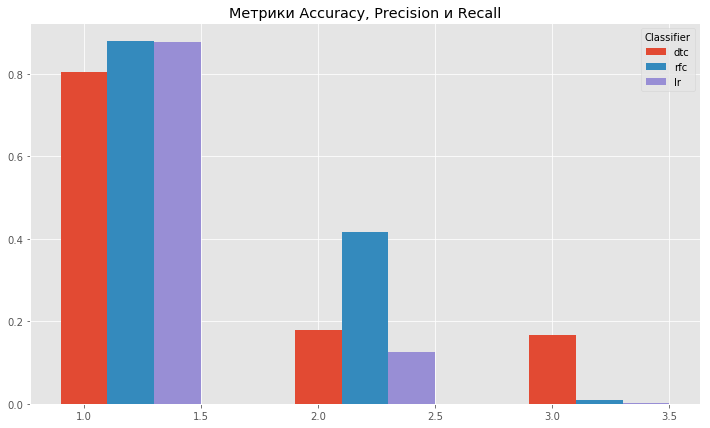

In [38]:
# Визуалищировать эти метрики всех моделей на одном графике (чтоб визуально посмотреть)

## Your Code Here
wd = 0.2 
dtc_metr = [accuracy_score(y_tst, dtc_predict),precision_score(y_tst, dtc_predict),recall_score(y_tst, dtc_predict)]
rfc_metr = [accuracy_score(y_tst, rfc_predict),precision_score(y_tst, rfc_predict),recall_score(y_tst, rfc_predict)]
lr_metr = [accuracy_score(y_tst, lr_predict),precision_score(y_tst, lr_predict),recall_score(y_tst, lr_predict)]
plt.bar([1,2,3],dtc_metr, width=wd)
plt.bar([1+wd,2+wd,3+wd],rfc_metr, width=wd)
plt.bar([1+2*wd,2+2*wd,3+2*wd],lr_metr, width=wd)
plt.legend(['dtc', 'rfc','lr'],title = 'Classifier')
plt.title (u'Метрики Accuracy, Precision и Recall')

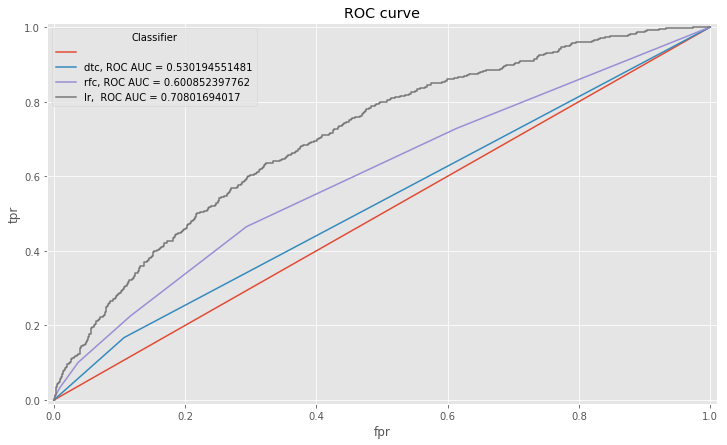

In [39]:
# Потроить roc-кривые всех моделей на одном графике
# Вывести roc_auc каждой моделе
## Your Code Here

from sklearn.metrics import roc_auc_score, roc_curve

fpr_dtc, tpr_dtc, thresholds_dtc = roc_curve(y_tst, dtc.predict(X_tst))
fpr_rfc, tpr_rfc, thresholds_rfc = roc_curve(y_tst, rfc.predict_proba(X_tst)[:,1])
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_tst, lr.predict_proba(X_tst)[:,1])

plt.plot([0, 1], [0, 1])
plt.plot(fpr_dtc, tpr_dtc)
plt.plot(fpr_rfc, tpr_rfc)
plt.plot(fpr_lr, tpr_lr)

roc_auc_dtc = roc_auc_score(y_tst, dtc.predict(X_tst))
roc_auc_rfc = roc_auc_score(y_tst, rfc.predict_proba(X_tst)[:,1])
roc_auc_lr = roc_auc_score(y_tst, lr.predict_proba(X_tst)[:,1])

plt.ylabel('tpr')
plt.xlabel('fpr')
plt.grid(True)
plt.title('ROC curve')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))

plt.legend(['',
            'dtc, ROC AUC = ' + str(roc_auc_dtc), 
            'rfc, ROC AUC = ' + str(roc_auc_rfc),
            'lr,  ROC AUC = ' + str(roc_auc_lr)],title = 'Classifier')

In [40]:
from sklearn.cross_validation import cross_val_score
from sklearn.model_selection import StratifiedKFold
# Сделать k-fold (10 фолдов) кросс-валидацию каждой модели
# И посчитать средний roc_auc

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=123)
## Your Code Here

cv_roc_auc_dtc, cv_roc_auc_rfc,cv_roc_auc_lr = 0,0,0

for train_index, test_index in cv.split(X, y):
#    print "TRAIN:", train_index[:5] , train_index[-5:],"TEST:", test_index[:5] ,test_index[-5:]
    X_trn, X_tst = X.T[train_index], X.T[test_index]
    y_trn, y_tst = y[train_index], y[test_index]

    dtc = DecisionTreeClassifier(criterion='entropy')
    dtc.fit(X_trn.T, y_trn)
    dtc_predict = dtc.predict(X_tst.T)
    #=============================================================================================
    rfc = RandomForestClassifier()
    rfc.fit(X_trn.T, y_trn)
    rfc_predict = rfc.predict(X_tst.T)
    rfc_predict_pr = rfc.predict_proba(X_tst.T)
    #=============================================================================================
    lr = LogisticRegression(C=1.0, fit_intercept=True, penalty='l1')
    lr.fit(X_trn.T, y_trn)
    lr_predict = lr.predict(X_tst.T)
    lr_predict_pr = lr.predict_proba(X_tst.T)
    
    cv_roc_auc_dtc += (roc_auc_score(y_tst, dtc.predict(X_tst.T)))/10
    cv_roc_auc_rfc += (roc_auc_score(y_tst, rfc.predict_proba(X_tst.T)[:,1]))/10
    cv_roc_auc_lr += (roc_auc_score(y_tst, lr.predict_proba(X_tst.T)[:,1]))/10
    #==================================================================


C:\Users\Samsung\Anaconda2\lib\site-packages\sklearn\linear_model\base.py:352: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)


In [41]:
pd.DataFrame([[cv_roc_auc_dtc, cv_roc_auc_rfc, cv_roc_auc_lr]],['Av. ROC AUC'],['dtc','rfc','lr']) 

,dtc,rfc,lr
Av. ROC AUC,0.534736,0.592716,0.6891


In [42]:
# Взять лучшую модель и сделать predict (с вероятностями (!!!)) для test выборки
## Your Code Here
clsf_fin = lr
predict_fin = clsf_fin.predict(X_test)
predict_pr_fin = clsf_fin.predict_proba(X_test)

In [43]:
# Померить roc_auc на тесте
roc_auc_clsf_fin = roc_auc_score(y_test, predict_pr_fin[:,1])
print 'ROC AUC классификаиора-победителя ' , roc_auc_clsf_fin

ROC AUC классификаиора-победителя  0.693428224056
